# UK shape file map with Postcode regions

### The following sources have been used:

Map Plotting:  http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/   
UK geoJSONs:   https://mapzen.com/data/metro-extracts/metro/london_england/  
geoPandas:     https://vimeo.com/79535664


In [1]:
'''
Initialisation
* Import packages
* Initialise data
'''

#from geopandas import *
#from geopandas import GeoSeries, GeoDataFrame
###from geopandas.geocode import geocode
#from shapely.geometry import LineString
#import matplotlib.cm

#plot
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
%matplotlib inline

#Pandas
import pandas as pd
import geopandas as gpd

#utilities
import numpy as np
import time, os

#path definitions
print(os.getcwd())

C:\GA\RTA


In [2]:
shapefile = 'Data/Areas.shp'

start_time0 = time.time()
a = gpd.GeoDataFrame.from_file(shapefile)
print "Geopandas shapefile load: %s seconds " % (time.time() - start_time0)

Geopandas shapefile load: 1.03399991989 seconds 


Geopandas UK postcode areas plot : 10.3369998932 seconds 


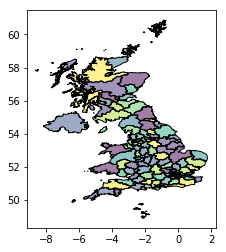

In [3]:
start_time0 = time.time()
a.set_index('name', inplace = True)
a.sort_index(inplace = True)
plt.rcParams['savefig.dpi'] = 200
a.plot()
print "Geopandas UK postcode areas plot : %s seconds " % (time.time() - start_time0)

# London Road map (geojson to shape file mapping)

In [4]:
start_time0 = time.time()
df = gpd.read_file('Data/london_england_roads.geojson')
df = df.fillna(np.nan)
print "Geopandas json 'London' load: %s seconds " % (time.time() - start_time0)

Geopandas json 'London' load: 107.996000051 seconds 


In [5]:
#inspect data
print(df.shape)
print(df.info())
print(df.head(5))

(657305, 13)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657305 entries, 0 to 657304
Data columns (total 13 columns):
access      38250 non-null object
bridge      657305 non-null int64
class       657305 non-null object
geometry    657305 non-null object
id          657305 non-null float64
name        296660 non-null object
oneway      657305 non-null int64
osm_id      657305 non-null float64
ref         53270 non-null object
service     45192 non-null object
tunnel      657305 non-null int64
type        657305 non-null object
z_order     657305 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 65.2+ MB
None
  access  bridge    class                                           geometry  \
0    NaN       0  highway  LINESTRING (-0.728574511263815 51.051699191756...   
1    NaN       0  highway  LINESTRING (-0.71956312716199 51.0526054431277...   
2    NaN       0  highway  LINESTRING (-0.694781108420131 51.034315376031...   
3    NaN       0  highway  L

In [6]:
print(df.head(20))

   access  bridge    class                                           geometry  \
0     NaN       0  highway  LINESTRING (-0.728574511263815 51.051699191756...   
1     NaN       0  highway  LINESTRING (-0.71956312716199 51.0526054431277...   
2     NaN       0  highway  LINESTRING (-0.694781108420131 51.034315376031...   
3     NaN       0  highway  LINESTRING (-0.699872024950622 51.036854338322...   
4     NaN       0  highway  LINESTRING (-0.706675448118517 51.038896840487...   
5     NaN       0  highway  LINESTRING (-0.706788017078139 51.035580037582...   
6     NaN       0  highway  LINESTRING (-0.724604758101833 51.041858837430...   
7     NaN       0  highway  LINESTRING (-0.706443437038672 51.031772222789...   
8     NaN       0  highway  LINESTRING (-0.71445460863481 51.0355105516053...   
9     NaN       0  highway  LINESTRING (-0.724795362579982 51.035273176107...   
10    NaN       0  highway  LINESTRING (-0.193130322274612 51.601747422102...   
11    NaN       0  highway  

In [7]:
#filter out null (NaN) rows against column 'ref' and inspect data
df_dref = df[df.ref.notnull()]
print(df_dref.shape)
print(df_dref.info())
print(df_dref.head(5))

(53270, 13)
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 53270 entries, 10 to 657276
Data columns (total 13 columns):
access      296 non-null object
bridge      53270 non-null int64
class       53270 non-null object
geometry    53270 non-null object
id          53270 non-null float64
name        42150 non-null object
oneway      53270 non-null int64
osm_id      53270 non-null float64
ref         53270 non-null object
service     103 non-null object
tunnel      53270 non-null int64
type        53270 non-null object
z_order     53270 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 5.7+ MB
None
   access  bridge    class                                           geometry  \
10    NaN       0  highway  LINESTRING (-0.193130322274612 51.601747422102...   
25    NaN       0  highway  LINESTRING (-0.197985539687892 51.597122120292...   
27    NaN       0  highway  LINESTRING (-0.176820563622499 51.617325775883...   
33    NaN       0  highway  LINESTRING (

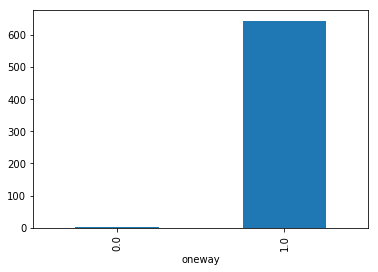

In [8]:
col = 'oneway'
df_dref[[col]].where(df_dref['ref']=='M25').groupby([col])[col].count().plot(kind='bar')
plt.show()

In [9]:
start_time0 = time.time()
#df_motorway = df[((df['ref'] == 'M25') & ((df_dref['type'] == 'motorway') | (df_dref['type'] == 'motorway_link')))] 
df_motorway = df_dref[(df_dref['type'] == 'motorway') | # all motorways
                      (df_dref['type'] == 'motorway_link') | # accidents at junctions can be included
                      (df_dref['ref'] == 'A282')] # Dartford crossing is an 'A' road.

df_motorway.to_file(driver='ESRI Shapefile',filename=r'Data/M25.shp')

print "Geopandas Dataframe 'motorway' file save: %s seconds " % (time.time() - start_time0)



Geopandas Dataframe 'motorway' file save: 2.22399997711 seconds 


Geopandas Dataframe 'motorway' plot: 8.01799988747 seconds 


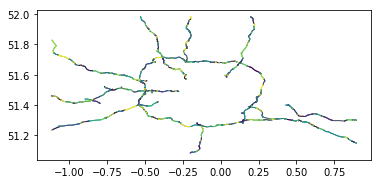

In [10]:
start_time0 = time.time()
df_motorway.plot()
print "Geopandas Dataframe 'motorway' plot: %s seconds " % (time.time() - start_time0)

In [11]:
'''
Load shape file 
tempory code whilst checking LINEPLOT functionality
'''

shapefile = 'Data/M25.shp'

start_time_M25 = time.time()
df = gpd.GeoDataFrame.from_file(shapefile)
print "Geopandas M25 Shapefile Dataframe load: %s seconds " % (time.time() - start_time_M25)

Geopandas M25 Shapefile Dataframe load: 0.315999984741 seconds 


Geopandas Dataframe 'motorway' plot: 1.45000004768 seconds 
   access  bridge    class                                           geometry  \
1    None       0  highway  LINESTRING (-0.230665406694982 51.687052481450...   
2    None       0  highway  LINESTRING (-0.393057236968957 51.715004787430...   
5    None       0  highway  LINESTRING (-0.500782630021405 51.537271224501...   
7    None       0  highway  LINESTRING (-0.540270446424074 51.562613573470...   
16   None       0  highway  LINESTRING (-0.491052749179516 51.353559269134...   

       id  name  oneway     osm_id  ref service  tunnel           type  \
1   500.0  None       1     2842.0  M25    None       0       motorway   
2   503.0  None       1     2845.0  M25    None       0       motorway   
5   786.0  None       1   131631.0  M25    None       0       motorway   
7   856.0  None       1  1095133.0  M25    None       0  motorway_link   
16  916.0  None       1  1056074.0  M25    None       0       motorway   

    z_or

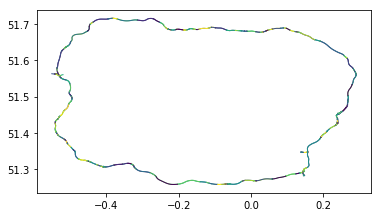

In [12]:
start_time0 = time.time()
#df_motorway = df[((df['ref'] == 'M25') & ((df_dref['type'] == 'motorway') | (df_dref['type'] == 'motorway_link')))] 
#df_motorway = df_dref[(df_dref['type'] == 'motorway') | (df_dref['type'] == 'motorway_link')] 
df_motorway = df[(df['ref'] == 'M25') | (df['ref'] == 'A282')] #& (df_dref['type'] == 'motorway'))] 
#df_motorway = df[((df['ref'] == 'M25') & ((df_dref['tunnel'] == 1) | df_dref['type'] == 'motorway'))] 
#df_motorway.to_file(driver='ESRI Shapefile',filename=r'../Road_safety/Data/M25.shp')

df_motorway.plot()
print "Geopandas Dataframe 'motorway' plot: %s seconds " % (time.time() - start_time0)

print(df_motorway.head())

start_time0 = time.time()
#df_dref.plot()
print "Geopandas Dataframe plot: %s seconds " % (time.time() - start_time0)

x = df_motorway[['geometry']]
print(x)